
### DESCRIPTION

##### Background of Problem Statement :

- NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

##### Problem Objective : Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

- Domain: Customer Service

#####  Analysis Tasks to be performed:
- (Perform a service request data analysis of New York City 311 calls) 
1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column 'Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the following:

-  Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

 - Whether the average response time across complaint types is similar or not (overall)
  - Are the type of complaint or service requested and location related?

**Happy coding!**

* * *

#### Import necessary packges

In [ ]:
import numpy as np
import pandas as pd

#### Load data

In [ ]:
df = pd.read_csv('./311_Service_Requests_from_2010_to_Present.csv',low_memory=False)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

###  Find the null columns and drop it

In [ ]:
df.isnull().sum()/len(df)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [ ]:
df.shape

(300698, 53)

In [ ]:
df.drop(['Agency','Intersection Street 1','Intersection Street 2','Landmark','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp', 'Bridge Highway Segment',  'Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1,inplace=True)

In [ ]:
df.shape

(300698, 38)

In [ ]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760


## Import datatime module

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column 'Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)


In [ ]:
import datetime

In [ ]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300693   2015-03-29 00:33:41
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: Created Date, Length: 300698, dtype: datetime64[ns]

In [ ]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Closed Date']

0        2016-01-01 00:55:00
1        2016-01-01 01:26:00
2        2016-01-01 04:51:00
3        2016-01-01 07:43:00
4        2016-01-01 03:24:00
                 ...        
300693                   NaT
300694   2015-03-29 02:33:59
300695   2015-03-29 03:40:20
300696   2015-03-29 04:38:35
300697   2015-03-29 04:41:50
Name: Closed Date, Length: 300698, dtype: datetime64[ns]

In [ ]:
df['Request_Closing_Time']=df['Closed Date']-df['Created Date']

In [ ]:
d=df['Request_Closing_Time']

In [ ]:
df['seconds_to_solve'] = d.dt.seconds

In [ ]:
df['hours_to_solve'] = df['seconds_to_solve'] / 3600

In [ ]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,seconds_to_solve,hours_to_solve
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,5176.0,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,17491.0,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,27914.0,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,12422.0,3.450556


### Major insights/patterns in the visual format (graphs or tables)
- Major insights/patterns that you can offer in a visual format (graphs or tables)
- at least 4 major conclusions that you can come up with after generic data mining

In [ ]:
from matplotlib  import image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df.keys()

NameError: ignored

# Find the how many Agency Working

In [ ]:
df['Agency Name'].nunique()

3

In [ ]:
print(df['Agency Name'].unique())

['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']


Only 3 **Agency Name** working.
Name of these
1. New York City Police Department
2. NYPD
3. Internal Affairs Bureau

## Which agency solve maximum problem?

In [ ]:
df['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

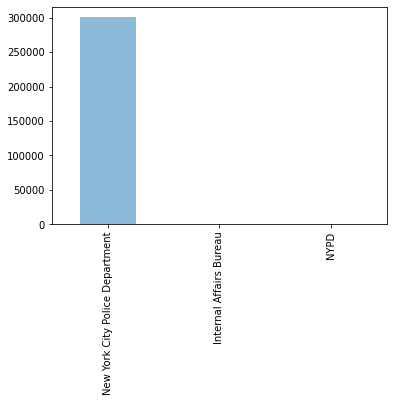

In [ ]:
df['Agency Name'].value_counts().plot(kind='bar',alpha=0.5)

### Ans-  Maximum **'New York City Police Department'** Agency solved maximum problem

# What are type Complaint Type?

In [ ]:
df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

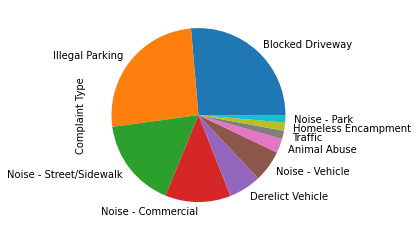

In [ ]:
df['Complaint Type'].value_counts().head(10).plot(kind='pie')

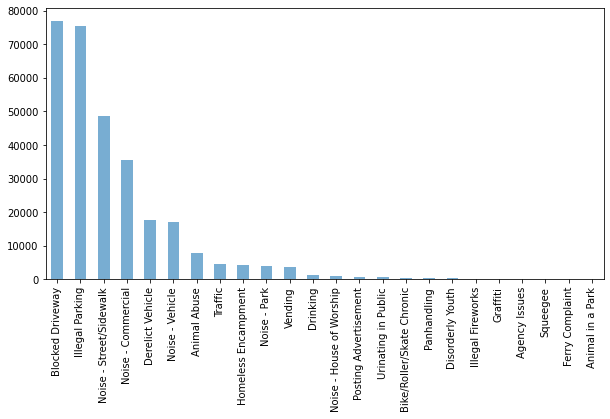

In [ ]:
#complaint type breakdown with bars plot to figure out the top 10 complaints
df['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6, figsize=(10,5))
plt.show()

 Total 24 types of Complaint
 
-Out of these "Blocked Driveway" and "Illegal Parking" have maximum compliant

## What are different Location ?

In [ ]:
df['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

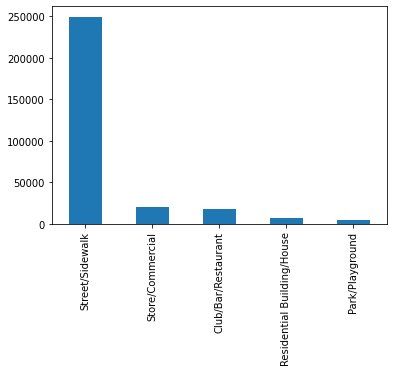

In [ ]:
df['Location Type'].value_counts().head(5).plot(kind='bar')

- Total 18 different location types out of this "Street/Sidewalk " is maximum

# Count city and count city with differnt complaint

In [ ]:
df['City'].value_counts().head(5)

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

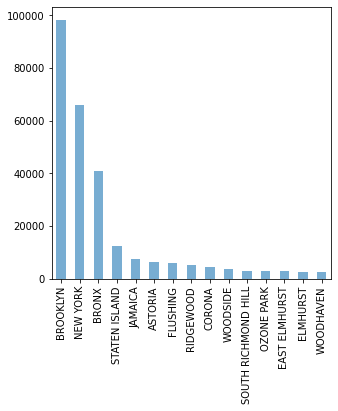

In [ ]:
#Complaint by city
df['City'].value_counts().head(15).plot(kind='bar', alpha=0.6, figsize=(5,5))
plt.show()

# Borough

In [ ]:
print(df['Borough'].value_counts())
print(df['Borough'].unique())

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64
['MANHATTAN' 'QUEENS' 'BRONX' 'BROOKLYN' 'Unspecified' 'STATEN ISLAND']


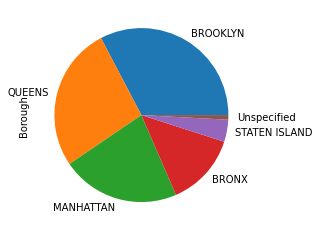

In [ ]:
df['Borough'].value_counts().plot(kind='pie')

# Calculate Descriptor 

In [ ]:
df['Descriptor'].value_counts()

Loud Music/Party                  61430
No Access                         56976
Posted Parking Sign Violation     22440
Loud Talking                      21584
Partial Access                    20068
With License Plate                17718
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Car/Truck Music                   11273
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Engine Idling                      4189
Banging/Pounding                   4165
Neglected                          3787
Car/Truck Horn                     3511
Congestion/Gridlock                2761
In Prohibited Area                 2025
Other (complaint details)          1969
Unlicensed                         1777
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Truck Route Violation              1014
In Public                           932
Tortured                            854


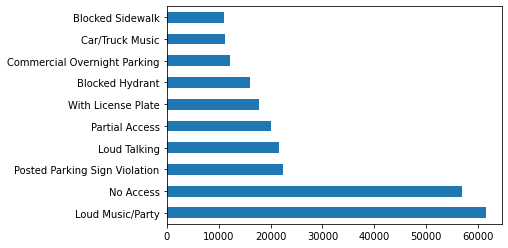

In [ ]:
df['Descriptor'].value_counts().head(10).plot(kind='barh')
plt.show()

# Complaint Per Location

In [ ]:
Complaint_Per_Location=df[['Unique Key','Location Type','Complaint Type']].groupby(by=['Location Type','Complaint Type'])

In [ ]:
Complaint_Per_Location.count()

Unique Key
Location Type       Complaint Type                 
Bridge              Homeless Encampment           2
Club/Bar/Restaurant Drinking                    366
                    Noise - Commercial        16973
                    Urinating in Public          21
Commercial          Animal Abuse                 62
...                                             ...
Street/Sidewalk     Vending                    3061
Subway Station      Animal Abuse                 22
                    Urinating in Public          12
Terminal            Ferry Complaint               1
Vacant Lot          Derelict Vehicle             77

[71 rows x 1 columns]

In [ ]:
df_count = Complaint_Per_Location.count()

In [ ]:
df_group = df_count.unstack()#.reset_index()

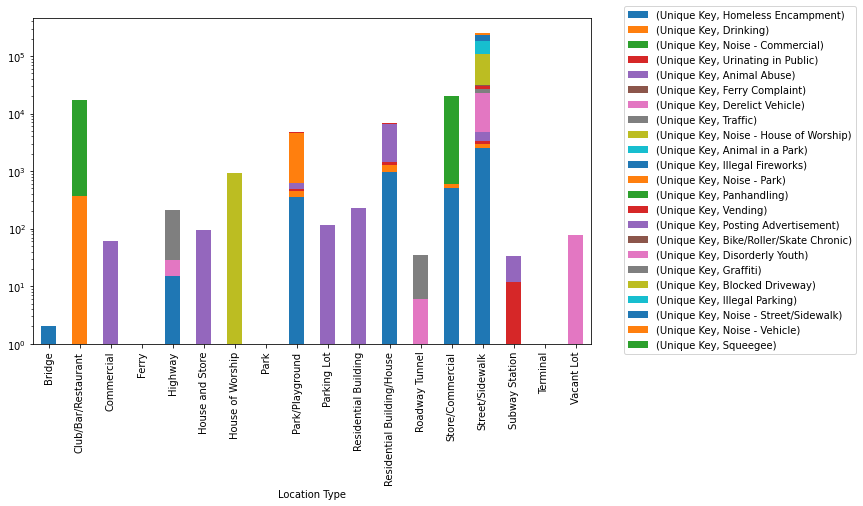

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
fig= df_group.plot(kind='bar',stacked=True,ax=ax)
fig.legend(bbox_to_anchor=[1.05,1.05])
plt.yscale('log')

# Order the complaint types based on 
- the average ‘Request_Closing_Time’, grouping them for different locations

In [ ]:
df_avg_time = df[['Complaint Type','Request_Closing_Time','City','Location Type']].groupby(by=['City','Location Type','Complaint Type','Request_Closing_Time'])

In [ ]:
df_avg_time.count()

Empty DataFrame
Columns: []
Index: [(ARVERNE, Club/Bar/Restaurant, Drinking, 0 days 00:14:19), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 00:12:58), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 00:34:00), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 00:51:08), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 00:57:31), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 01:22:00), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 01:27:02), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 01:31:58), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 02:12:34), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 02:20:40), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 02:40:41), (ARVERNE, House of Worship, Noise - House of Worship, 0 days 03:00:31), (ARVERNE, Park/Playground, Noise - Park, 0 days 00:46:00), (ARVERNE, Park/Playground, Noise - Park, 0 days 01:48:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 00:29:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 00:41:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 00:46:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 00:51:09), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 00:52:38), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 00:53:26), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:01:22), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:07:51), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:13:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:19:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:28:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:35:52), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:36:53), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:37:16), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:38:12), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:42:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:44:06), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 01:57:18), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:02:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:07:21), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:08:07), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:17:38), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:23:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:29:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:33:37), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:40:13), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:53:40), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 02:53:57), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 03:17:04), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 03:18:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 03:27:59), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 03:30:53), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 03:32:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 03:41:00), (ARVERNE, Residential Building/House, Animal Abuse, 0 days 05:01:35), (ARVERNE, Residential Building/House, Homeless Encampment, 0 days 02:32:54), (ARVERNE, Store/Commercial, Graffiti, 0 days 01:32:00), (ARVERNE, Store/Commercial, Noise - Commercial, 0 days 01:30:37), (ARVERNE, Store/Commercial, Noise - Commercial, 0 days 03:03:51), (ARVERNE, Street/Sidewalk, Animal Abuse, 0 days 00:55:58), (ARVERNE, Street/Sidewalk, Animal Abuse, 0 days 01:35:00), (ARVERNE, Street/Sidewalk, Animal Abuse, 0 days 06:28:11), (ARVERNE, Street/Sidewalk, Blocked Driveway, 0 days 00:17:44), (ARVERNE, Street/Sidewalk, Blocked Drive

In [ ]:
df_close_time=pd.DataFrame({'Total':df.groupby(['Complaint Type','Request_Closing_Time']).size()}).reset_index()
df_close_time

,Complaint Type,Request_Closing_Time,Total
0,Agency Issues,0 days 01:07:53,1
1,Agency Issues,0 days 02:42:16,1
2,Agency Issues,0 days 02:57:08,1
3,Agency Issues,0 days 06:51:26,1
4,Agency Issues,0 days 07:32:00,1
...,...,...,...
129915,Vending,2 days 04:01:28,1
129916,Vending,2 days 16:22:36,1
129917,Vending,2 days 17:11:00,1
129918,Vending,2 days 18:24:26,1


In [ ]:
ComplaintTypePerCity = pd.DataFrame({'Total':df.groupby(['Complaint Type','City']).size()}).reset_index()
ComplaintTypePerCity

,Complaint Type,City,Total
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [ ]:
dfbcd=df.groupby(['Borough','Complaint Type','Descriptor']).size()
dfbcd

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

In [ ]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time', 'seconds_to_solve', 'hours_to_solve'],
      dtype='object')

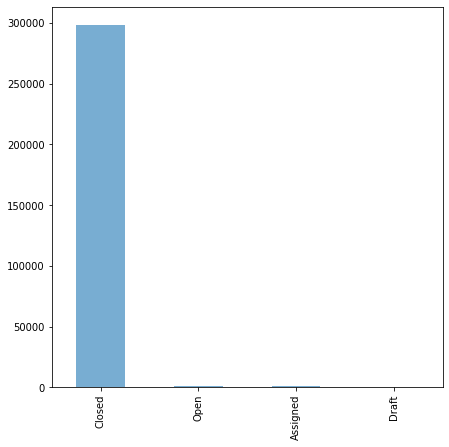

In [ ]:
#Have a look at the status of tickets
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

In [ ]:
majorComplaints=df.dropna(subset=["Complaint Type"])
majorComplaints=df.groupby("Complaint Type")

sortedComplaintType = majorComplaints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType.head(10)

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


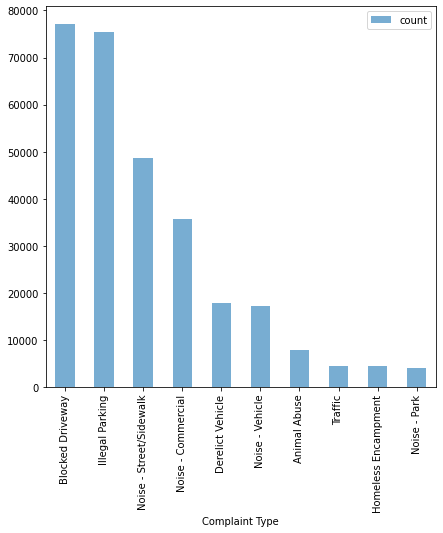

In [ ]:
sortedComplaintType.head(10).plot(kind='bar',x='Complaint Type',alpha=0.6,figsize=(7,7))

# Draw complaints with scatter plot

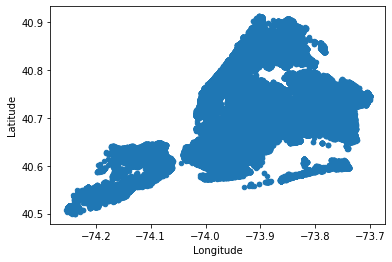

In [ ]:
complaints=df
complaints[['Complaint Type', 'Borough']]
complaints.plot(kind='scatter', x='Longitude', y='Latitude')

In [ ]:

df_g = complaints.groupby(['Borough', 'Complaint Type'])

In [ ]:
df_g.size()

Borough      Complaint Type           
BRONX        Animal Abuse                  1415
             Bike/Roller/Skate Chronic       20
             Blocked Driveway             12755
             Derelict Vehicle              1953
             Disorderly Youth                63
                                          ...  
Unspecified  Noise - Vehicle                 54
             Panhandling                      2
             Posting Advertisement            1
             Traffic                          1
             Vending                          7
Length: 119, dtype: int64

In [ ]:
df_g.size().to_frame()

0
Borough     Complaint Type                  
BRONX       Animal Abuse                1415
            Bike/Roller/Skate Chronic     20
            Blocked Driveway           12755
            Derelict Vehicle            1953
            Disorderly Youth              63
...                                      ...
Unspecified Noise - Vehicle               54
            Panhandling                    2
            Posting Advertisement          1
            Traffic                        1
            Vending                        7

[119 rows x 1 columns]

In [ ]:
counts = df_g.size().to_frame()
counts = counts.rename(columns={0 : "Count"})
counts[:5]

Count
Borough Complaint Type                  
BRONX   Animal Abuse                1415
        Bike/Roller/Skate Chronic     20
        Blocked Driveway           12755
        Derelict Vehicle            1953
        Disorderly Youth              63

# Hypothesis Testing

### Whether the average response time across complaint types is similar or not (overall)?
- H0: average response time across complaint types is similar 
    - Reject Null Hypothesis
- H1: average response time across complaint types is not similar
    - Fail to Reject Null Hypothesis

In [ ]:
avg_Response_Time=np.mean(df['hours_to_solve'])
print(avg_Response_Time)

3.929396621862499


In [ ]:
!pip install scipy

In [ ]:
!pip install statsmodels

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np

dd=df['hours_to_solve']

ages_mean = np.mean(dd)

tset, pval = ttest_1samp(dd, ages_mean)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Average response time across complaint types is similar")
else:
  print("Average response time across complaint types is not similar")

Average response time across complaint types is not similar


#### We reject null hypothesis hence 
**Average response time across complaint types is not similar**

# 2. Hypothesis Testing 
### Question- Are the type of complaint or service requested and location related?

Whether the average response time across complaint types is similar or not (overall)?

**H0: type of complaint or service requested and location related 
similar Reject Null Hypothesis or no association**
  i.e if alpha > 0.05

**H1: type of complaint or service requested and location related 
similar Fail to Reject Null Hypothesis or  association**
  i.e if alpha < 0.05

In [ ]:
#  Chi-Squared Test
from scipy.stats import chi2_contingency

In [ ]:
df_chi = df
contingency_table=pd.crosstab(df_chi["Complaint Type"],df_chi["Location Type"])
print('contingency_table :-\n',contingency_table)


contingency_table :-
 Location Type              Bridge  Club/Bar/Restaurant  ...  Terminal  Vacant Lot
Complaint Type                                          ...                      
Animal Abuse                    0                    0  ...         0           0
Animal in a Park                0                    0  ...         0           0
Bike/Roller/Skate Chronic       0                    0  ...         0           0
Blocked Driveway                0                    0  ...         0           0
Derelict Vehicle                0                    0  ...         0          77
Disorderly Youth                0                    0  ...         0           0
Drinking                        0                  366  ...         0           0
Ferry Complaint                 0                    0  ...         1           0
Graffiti                        0                    0  ...         0           0
Homeless Encampment             2                    0  ...         0       

In [ ]:
import scipy
from scipy.stats import chi2

In [ ]:
!pip install stats

In [ ]:
#from scipy.stats import chi2_contingency
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[    0     0    62     0     0    93     0     0   123   110   227  5085
      0   522  1531    22     0     0]
 [    0     0     0     0     0     0     0     1     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0    26
      0    53   348     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0 77007     0     0     0]
 [    0     0     0     0    14     0     0     0     0     0     0     0
      5     0 17614     0     0    77]
 [    0     0     0     0     0     0     0     0     0     0     0    77
      0     8   201     0     0     0]
 [    0   366     0     0     0     0     0     0    98     0     0   291
      0    90   434     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0     0     0
      0     0     0     0     1     0]
 [    0     0     0     0     0     0     0     0     0     0     0    56
  

In [ ]:
g, p, dof, expctd=chi2_contingency(contingency_table)
#b=stats.chi2_contingency(contingency_table)

In [ ]:
Expected_Values = expctd
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[5.17355531e-02 4.49064601e+02 1.60380215e+00 2.58677766e-02
  5.56157196e+00 2.40570322e+00 2.40311644e+01 2.58677766e-02
  1.23466898e+02 3.02652986e+00 5.87198528e+00 1.80039725e+02
  9.05372180e-01 5.27211154e+02 6.44881083e+03 8.79504403e-01
  2.58677766e-02 1.99181880e+00]
 [6.65409044e-06 5.77575050e-02 2.06276804e-04 3.32704522e-06
  7.15314722e-04 3.09415205e-04 3.09082501e-03 3.32704522e-06
  1.58799868e-02 3.89264290e-04 7.55239264e-04 2.31562347e-02
  1.16446583e-04 6.78085086e-02 8.29429046e-01 1.13119537e-04
  3.32704522e-06 2.56182482e-04]
 [2.84129662e-03 2.46624546e+01 8.80801951e-02 1.42064831e-03
  3.05439386e-01 1.32120293e-01 1.31978228e+00 1.42064831e-03
  6.78075437e+00 1.66215852e-01 3.22487166e-01 9.88771222e+00
  4.97226908e-02 2.89542332e+01 3.54166203e+02 4.83020425e-02
  1.42064831e-03 1.09389920e-01]
 [5.12411542e-01 4.44773219e+03 1.58847578e+01 2.56205771e-01
  5.50842408e+01 2.38271367e+01 2.38015161e+02 2.56205771e-01
  1.22287015e

In [ ]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05


Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi-square statistic:- 124821.57169248095
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 124821.57169248095
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


## There is relationship between "Complaint Type" and "Location"
#### -Hence Are the type of complaint or service requested and location related